<a href="https://colab.research.google.com/github/EB28/DataScience/blob/main/ML02_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


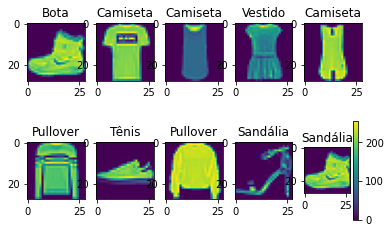

In [3]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco',
                           'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

plt.imshow(imagens_treino[0])
plt.colorbar()

In [21]:
#normalização

imagens_treino = imagens_treino/float(255)

modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.1008 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.0983
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1009 - val_loss: 2.3026 - val_accuracy: 0.0995
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1004 - val_loss: 2.3029 - val_accuracy: 0.0957


In [27]:
pesos_camada_dense = modelo.layers[1].get_weights()

In [25]:
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

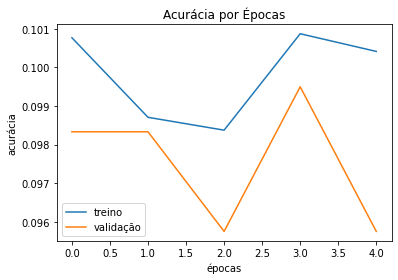

In [23]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por Épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

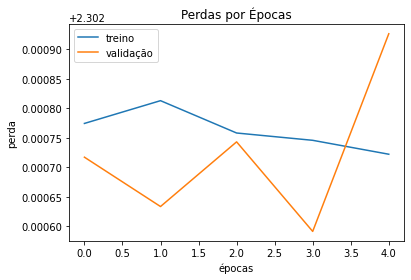

In [24]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por Épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [26]:
testes = modelo.predict(imagens_teste)
print('resultado teste: ',np.argmax(testes[1]))
print('número da imagem de teste: ', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('Resultado teste modelo salvo: ', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste: ', identificacoes_teste[1])

313/313 [==============================] - 1s 2ms/step
resultado teste:  2
número da imagem de teste:  2
313/313 [==============================] - 1s 2ms/step
Resultado teste modelo salvo:  2
número da imagem de teste:  2


In [6]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste', perda_teste)
print('Acuracia do teste', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 63.8702 - accuracy: 0.8567
Perda do teste 63.870155334472656
Acuracia do teste 0.8567000031471252
